In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2025-02-11 01:09:59--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.239.15.217, 18.239.15.40, 18.239.15.127, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.239.15.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2025-02-11 01:09:59 (231 MB/s) - ‘aerofit_treadmill.csv?1639992749’ saved [7279/7279]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('aerofit_treadmill.csv?1639992749')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
data.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
data['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
data['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [ ]:
data['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [ ]:
data['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [ ]:
data['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [ ]:
data['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [ ]:
data['Age'].describe()

,Age
count,180.000000
mean,28.788889
std,6.943498
min,18.000000
25%,24.000000
50%,26.000000
75%,33.000000
max,50.000000


In [ ]:
age_points = [15,20,25,30,35,50]
age_labels = ['15-20','20-25','25-30','30-35','35+']

In [ ]:
data['Age_Group'] = pd.cut(data['Age'],bins=age_points,labels=age_labels)

In [ ]:
data['Age_Group'].value_counts()

,count
Age_Group,
20-25,69
25-30,41
30-35,32
35+,28
15-20,10


In [ ]:
income_bins = [29000,40000,50000,60000,80000,110000]
income_labels = ['29000-40000','40000-50000','50000-60000','60000-80000','80000+']

In [ ]:
data['Income_Group'] = pd.cut(data['Income'],bins=income_bins,labels=income_labels)

In [ ]:
data['Income_Group'].value_counts()

,count
Income_Group,
50000-60000,55
40000-50000,51
29000-40000,32
60000-80000,23
80000+,19


In [ ]:
data_gender = pd.crosstab(data['Gender'],data['Product'],normalize = 'index')

In [ ]:
data_gender

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


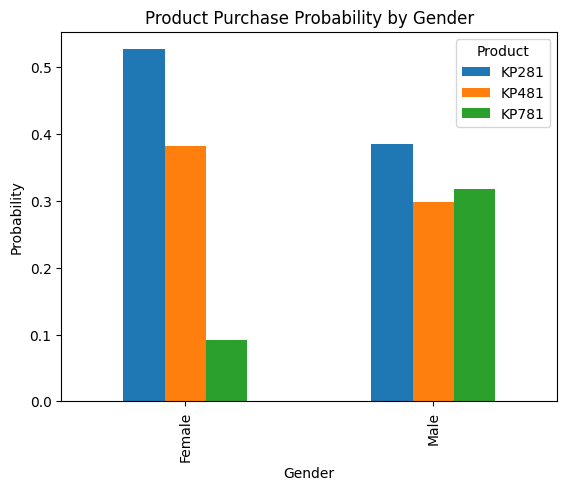

In [ ]:
data_gender.plot(kind='bar')
plt.title('Product Purchase Probability by Gender')
plt.xlabel('Gender')
plt.ylabel('Probability')
plt.legend(title='Product')
plt.show()

In [ ]:
data_Age_Group = pd.crosstab(data['Age_Group'],data['Product'],normalize = 'index')

In [ ]:
data_Age_Group

Product,KP281,KP481,KP781
Age_Group,,,
15-20,0.600000,0.400000,0.000000
20-25,0.405797,0.347826,0.246377
25-30,0.512195,0.170732,0.317073
30-35,0.343750,0.531250,0.125000
35+,0.500000,0.285714,0.214286


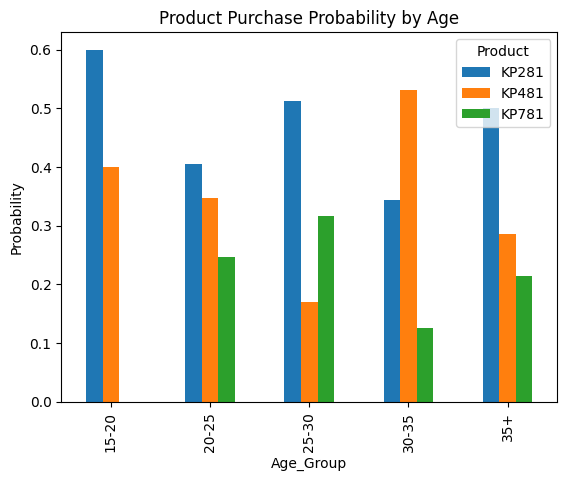

In [ ]:
data_Age_Group.plot(kind='bar')
plt.title('Product Purchase Probability by Age')
plt.xlabel('Age_Group')
plt.ylabel('Probability')
plt.legend(title='Product')
plt.show()

In [ ]:
data_income_groups = pd.crosstab(data['Income_Group'],data['Product'],normalize = 'index')

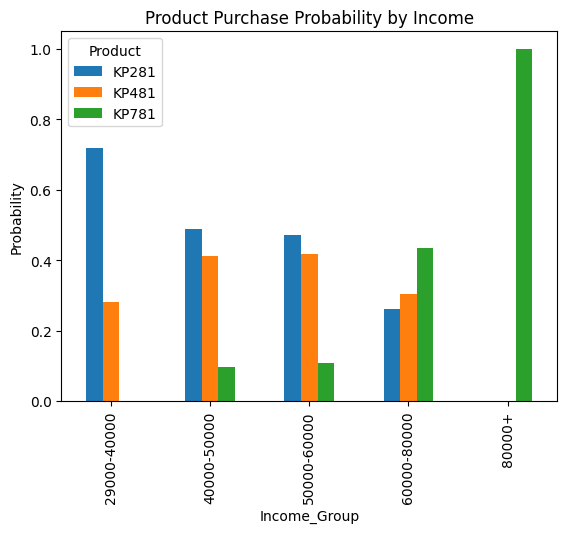

In [ ]:
data_income_groups.plot(kind='bar')
plt.title('Product Purchase Probability by Income')
plt.xlabel('Income_Group')
plt.ylabel('Probability')
plt.legend(title='Product')
plt.show()

In [ ]:
data_fitnesss = pd.crosstab(data['Fitness'],data['Product'],normalize = 'index')

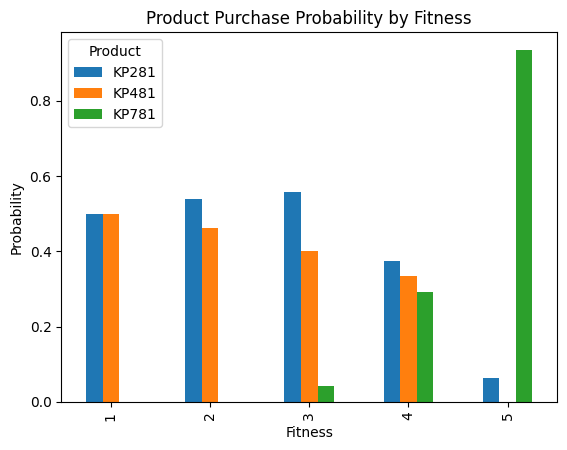

In [ ]:
data_fitnesss.plot(kind='bar')
plt.title('Product Purchase Probability by Fitness')
plt.xlabel('Fitness')
plt.ylabel('Probability')
plt.legend(title='Product')
plt.show()

In [ ]:
data_MaritalStatus = pd.crosstab(data['MaritalStatus'],data['Product'],normalize = 'index')

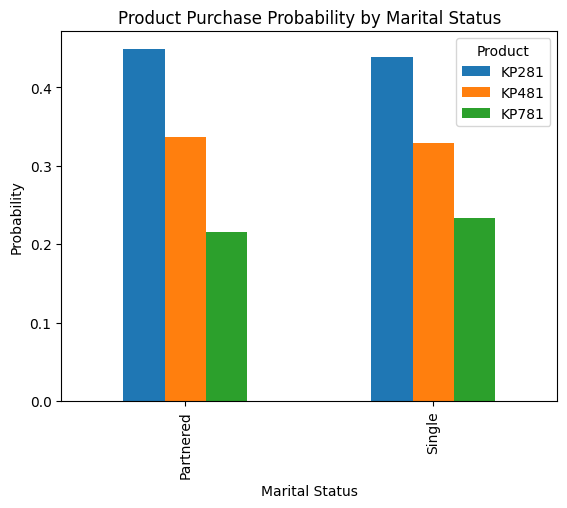

In [ ]:
data_MaritalStatus.plot(kind='bar')
plt.title('Product Purchase Probability by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Probability')
plt.legend(title='Product')
plt.show()

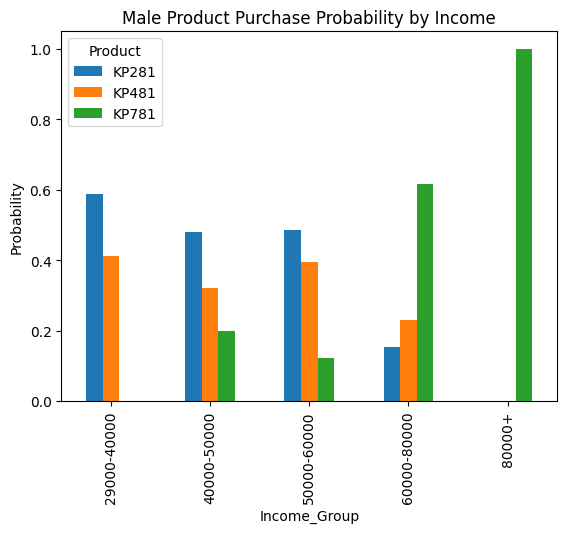

In [ ]:
pd.crosstab(data.loc[data['Gender'] == 'Male','Income_Group'],data['Product'],normalize = 'index').plot(kind='bar')
plt.title('Male Product Purchase Probability by Income')
plt.xlabel('Income_Group')
plt.ylabel('Probability')
plt.legend(title='Product')
plt.show()

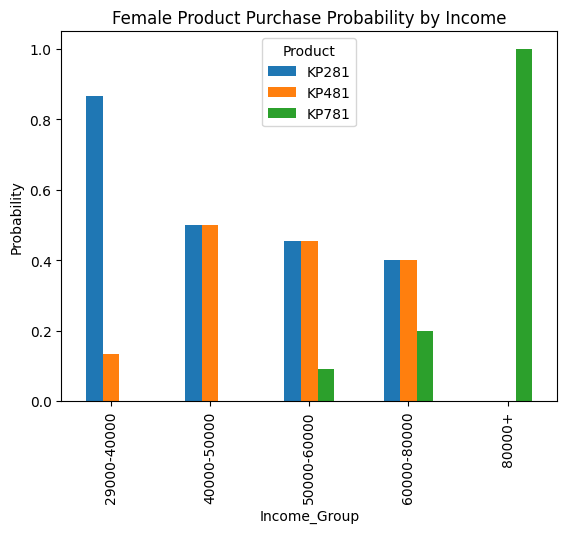

In [ ]:
pd.crosstab(data.loc[data['Gender'] == 'Female','Income_Group'],data['Product'],normalize = 'index').plot(kind='bar')
plt.title('Female Product Purchase Probability by Income')
plt.xlabel('Income_Group')
plt.ylabel('Probability')
plt.legend(title='Product')
plt.show()